# K Nearest Neighbour:
KNN stands for k-nearest neighbors. It's a simple and widely used supervised machine learning algorithm used for classification and regression tasks. In KNN, an object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (where k is a positive integer, typically small). In regression tasks, KNN estimates the value of a new data point by averaging the values of its k nearest neighbors.

In [47]:
# example of knn classifier on iris data using sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
# split the data into X and y
X=df.drop('species',axis=1)
y=df['species']

In [51]:
# load and fit knn classifier on the data
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

# predict the species for a new set of measurement
new_measurement=np.array([[5.1,2,4,2]])
knn.predict(new_measurement)

c:\Users\MC\miniconda3\envs\python_eda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'True')

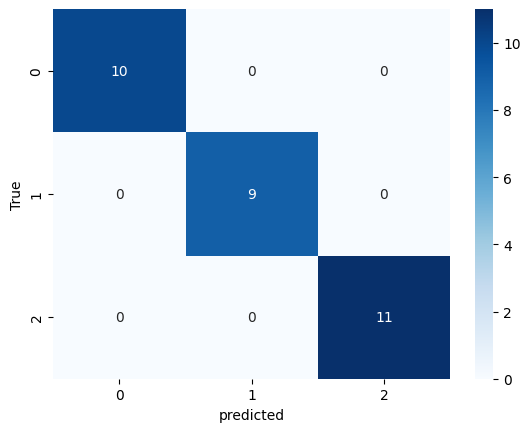

In [52]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=KNeighborsClassifier(n_neighbors=5)
# fit the model on the training data
model.fit(X_train,y_train)

# predict the species for the test data
y_pred=model.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True')


# Regression using KNN model

In [53]:
# regression problem on tips dataset

# load the dataset
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
# split the data into X and y
X=tips.drop('tip',axis=1)
y=tips['tip']

In [55]:
#encode the categorical column using for loop
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X.columns:
    if X[col].dtype=='object' or X[col].dtype=='category':
        X[col] = le.fit_transform(X[col])
    

In [56]:
# train test split the data and fit the model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
model=KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
# fit the model
model.fit(X_train,y_train)

# predict the model
y_pred=model.predict(X_test)

#evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
print(f'Mean square error:{mean_squared_error(y_test,y_pred)}')
print(f'r2_score:{r2_score(y_test,y_pred)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')

Mean square error:1.3993435076923078
r2_score:0.3112475366146433
RMSE:1.1829385054567747


In [58]:
# predict the specific value
model.predict([[19.82,1,0,1,1,3]])

c:\Users\MC\miniconda3\envs\python_eda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.9])